# Import and Mount Google Drive with Data

In [5]:
%load_ext autoreload
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from google.colab import drive
import os
drive.mount('/content/drive/', force_remount = True)
ROOT_PATH="/content/drive/My Drive/IFT6285-devoir5/"
IMAGES_PATH = ROOT_PATH
os.chdir(ROOT_PATH)
os.getcwd()

import numpy as np
np.random.seed(0)



import glob
import sys
import csv

import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Mounted at /content/drive/


'/content/drive/My Drive/IFT6285-devoir5'

In [ ]:
# !pip install pandas_profiling==2.9.0

In [ ]:
TRAIN_PATH= r'/content/drive/My Drive/Colab Notebooks/data/blog/train/'
TEST_PATH = r'/content/drive/My Drive/Colab Notebooks/data/blog/test/test1/'
BLOG_PATH = r'/content/drive/My Drive/Colab Notebooks/data/blog/'
# TRAIN_PATH= r'/content/drive/My Drive/Colab Notebooks/data/blog/train1/'
# TEST_PATH = r'/content/drive/My Drive/Colab Notebooks/data/blog/test1/'

# Convert all blog post to text file

In [ ]:
# !find /content/drive/My\ Drive/Colab\ Notebooks/data/blog/train/ -name "*csv" | \
# xargs -I % echo % | python3 csv2text.py > /content/drive/My\ Drive/Colab\ Notebooks/data/blog/blog.txt

In [ ]:
# !find /content/drive/My\ Drive/Colab\ Notebooks/data/blog/test/test1/ -name "*csv" | \
# xargs -I % echo % | python3 csv2text.py > /content/drive/My\ Drive/Colab\ Notebooks/data/blog/test1.txt
# !find /content/drive/My\ Drive/Colab\ Notebooks/data/blog/test/test2/ -name "*csv" | \
# xargs -I % echo % | python3 csv2text.py > /content/drive/My\ Drive/Colab\ Notebooks/data/blog/test2.txt

In [ ]:
!find /content/drive/My\ Drive/Colab\ Notebooks/data/blog/blog.txt -type f -exec cat {} \; | tr '.' "\n" | grep -v "^$" | wc -l

276316


In [ ]:
!head -1000 /content/drive/My\ Drive/Colab\ Notebooks/data/blog/blog.txt 

Total number of sentences

In [ ]:
%%shell
sent_count=$( wc -l < /content/drive/My\ Drive/Colab\ Notebooks/data/blog/blog.txt)
echo $sent_count

# Training time loop

In [ ]:
%%shell
sent_count=$( wc -l < /content/drive/My\ Drive/Colab\ Notebooks/data/blog/train/blog.txt)
echo $sent_count
# for i in 276315
for i in 1000 100000 500000 1000000
do
    echo $i
    # python3 word2vec-gensim-train.py ./result -l --nb $i --datapath /content/drive/My\ Drive/Colab\ Notebooks/data/blog/blog.txt
    head -$i /content/drive/My\ Drive/Colab\ Notebooks/data/blog/blog.txt | python3 word2vec-gensim-train.py ./result/run2/ -l --nb $i
done

Retreave training time

In [ ]:
%%shell
# grep "Loss" < ./result/run2/genw2v-size300-window5-neg10-mincount40-alpha0.03-minalpha0.0007-epochs10.log \
# | awk -F'] ' '{print $NF}' > ./result/train_loss.txt
# | awk '{print $7 "\t" $8}' > train_loss.txt
grep "time:" < ./result/run2/genw2v-size300-window5-neg10-mincount40-alpha0.03-minalpha0.0007-epochs10.log \
| awk -F'] ' '{print $NF}' > ./result/train_time.txt
grep "time:" < ./result/run2/genw2v-size300-window5-neg10-mincount40-alpha0.03-minalpha0.0007-epochs10.log 


INFO 23:09:56 [word2vec-gensim-train] v_size: 1000  time: 0.01
INFO 23:11:10 [word2vec-gensim-train] v_size: 100000  time: 0.92
INFO 22:46:44 [word2vec-gensim-train] v_size: 500000  time: 4.59
INFO 22:58:27 [word2vec-gensim-train] v_size: 1000000  time: 9.34


,v_size,time
0,1000,0.01
1,100000,0.92
2,500000,4.59
3,1000000,9.34


(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000.]), <a list of 8 Text major ticklabel objects>)

Text(0.5, 0, 'Nombre de phrases')

Text(0, 0.5, 'Temps [min]')

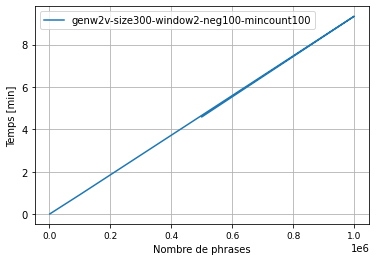

In [ ]:
filename = './result/train_time.txt'
with open(filename) as file:
     rows = (dict(entry.split(":", 1)
                  for entry in row.strip().split('  ')) for row in file)
     train_time_df = pd.DataFrame.from_dict(rows)
train_time_df.head()
train_time_df = train_time_df.sort_values(by=['v_size'], ascending=False)
train_time_df = train_time_df.apply(np.float64)
# train_time = pd.read_csv(filename, header=None).dropna()


# plt.plot(list(train_time_df['v_size']), list(train_time_df['time']), '-', color = '#FF0000', label = "Default_setting")
train_time_df.plot(x ='v_size', y='time', kind = 'line',label = "genw2v-size300-window2-neg100-mincount100")
#plt.xticks([16, 30, 50, 100, 200, 220, 240, 260, 280,  300, 400, 500,600] )
plt.xticks(fontsize=9)
# plt.xticks(np.arange(0e6, 9e6, 1e6))
# plt.ticklabel_format(style='sci', axis='x', scilimits=(6,6))
plt.xlabel('Nombre de phrases', fontsize = 10)
plt.ylabel('Temps [min]', fontsize = 10)
plt.grid()
plt.legend()
plt.savefig('time_sentences.png')
plt.show()

# Analyse de precision

In [6]:
import gensim
from gensim.models import Word2Vec

# filename = 'genw2v-size300-window5-neg10-mincount40-alpha0.03-minalpha0.0007-epochs10'
# outdir = './result/run3'
filename = 'genw2v-size300-window5-neg10-mincount40-alpha0.03-minalpha0.0007-epochs10'
outdir = './result/run7'
modelname = f"{outdir}/{filename}.w2v"

model = gensim.models.Word2Vec.load(modelname)
accuracy = model.accuracy('questions-words.txt')
print(accuracy)
    
sum_corr = len(accuracy[-1]['correct'])
sum_incorr = len(accuracy[-1]['incorrect'])
total = sum_corr + sum_incorr
percent = lambda a: a / total * 100
print('Total sentences: {}, Correct: {:.2f}%, Incorrect: {:.2f}%'.format(total, percent(sum_corr), percent(sum_incorr)))

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.wv.evaluate_word_analogies() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[{'section': 'capital-common-countries', 'correct': [('ATHENS', 'GREECE', 'BAGHDAD', 'IRAQ'), ('ATHENS', 'GREECE', 'BANGKOK', 'THAILAND'), ('ATHENS', 'GREECE', 'BEIJING', 'CHINA'), ('ATHENS', 'GREECE', 'LONDON', 'ENGLAND'), ('ATHENS', 'GREECE', 'MADRID', 'SPAIN'), ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'), ('ATHENS', 'GREECE', 'PARIS', 'FRANCE'), ('ATHENS', 'GREECE', 'TEHRAN', 'IRAN'), ('BAGHDAD', 'IRAQ', 'BEIJING', 'CHINA'), ('BAGHDAD', 'IRAQ', 'BERLIN', 'GERMANY'), ('BAGHDAD', 'IRAQ', 'CAIRO', 'EGYPT'), ('BAGHDAD', 'IRAQ', 'CANBERRA', 'AUSTRALIA'), ('BAGHDAD', 'IRAQ', 'KABUL', 'AFGHANISTAN'), ('BAGHDAD', 'IRAQ', 'MADRID', 'SPAIN'), ('BAGHDAD', 'IRAQ', 'MOSCOW', 'RUSSIA'), ('BAGHDAD', 'IRAQ', 'OTTAWA', 'CANADA'), ('BAGHDAD', 'IRAQ', 'PARIS', 'FRANCE'), ('BAGHDAD', 'IRAQ', 'TEHRAN', 'IRAN'), ('BAGHDAD', 'IRAQ', 'TOKYO', 'JAPAN'), ('BANGKOK', 'THAILAND', 'BEIJING', 'CHINA'), ('BANGKOK', 'THAILAND', 'BERLIN', 'GERMANY'), ('BANGKOK', 'THAILAND', 'CANBERRA', 'AUSTRALIA'), ('BANGKOK', 'THAIL

question test pour precision

In [7]:
model.accuracy('questions-words.txt')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.wv.evaluate_word_analogies() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[{'correct': [('ATHENS', 'GREECE', 'BAGHDAD', 'IRAQ'),
   ('ATHENS', 'GREECE', 'BANGKOK', 'THAILAND'),
   ('ATHENS', 'GREECE', 'BEIJING', 'CHINA'),
   ('ATHENS', 'GREECE', 'LONDON', 'ENGLAND'),
   ('ATHENS', 'GREECE', 'MADRID', 'SPAIN'),
   ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'),
   ('ATHENS', 'GREECE', 'PARIS', 'FRANCE'),
   ('ATHENS', 'GREECE', 'TEHRAN', 'IRAN'),
   ('BAGHDAD', 'IRAQ', 'BEIJING', 'CHINA'),
   ('BAGHDAD', 'IRAQ', 'BERLIN', 'GERMANY'),
   ('BAGHDAD', 'IRAQ', 'CAIRO', 'EGYPT'),
   ('BAGHDAD', 'IRAQ', 'CANBERRA', 'AUSTRALIA'),
   ('BAGHDAD', 'IRAQ', 'KABUL', 'AFGHANISTAN'),
   ('BAGHDAD', 'IRAQ', 'MADRID', 'SPAIN'),
   ('BAGHDAD', 'IRAQ', 'MOSCOW', 'RUSSIA'),
   ('BAGHDAD', 'IRAQ', 'OTTAWA', 'CANADA'),
   ('BAGHDAD', 'IRAQ', 'PARIS', 'FRANCE'),
   ('BAGHDAD', 'IRAQ', 'TEHRAN', 'IRAN'),
   ('BAGHDAD', 'IRAQ', 'TOKYO', 'JAPAN'),
   ('BANGKOK', 'THAILAND', 'BEIJING', 'CHINA'),
   ('BANGKOK', 'THAILAND', 'BERLIN', 'GERMANY'),
   ('BANGKOK', 'THAILAND', 'CANBERRA', 'AUSTRAL

In [ ]:
accuracies = dict()
for sec in accuracy:
    if sec["section"] not in accuracies:
        accuracies[sec["section"]] = 0
    correct, incorrect = len(sec["correct"]), len(sec["incorrect"])
    if incorrect > 0:
        acc = correct / (correct + incorrect)
    else:
        acc = 0
    accuracies[sec["section"]]= (correct, incorrect, acc)
accuracies_df = pd.DataFrame.from_dict(accuracies,orient='index',
                       columns=['correct', 'incorrect', 'accuracy'])
print(accuracies_df.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  correct &  incorrect &  accuracy \\
\midrule
capital-common-countries    &      179 &         93 &  0.658088 \\
capital-world               &      130 &        105 &  0.553191 \\
currency                    &        2 &         38 &  0.050000 \\
city-in-state               &      443 &       1136 &  0.280557 \\
family                      &      333 &         47 &  0.876316 \\
gram1-adjective-to-adverb   &      208 &        722 &  0.223656 \\
gram2-opposite              &      213 &        387 &  0.355000 \\
gram3-comparative           &     1147 &        185 &  0.861111 \\
gram4-superlative           &      713 &        157 &  0.819540 \\
gram5-present-participle    &      815 &        177 &  0.821573 \\
gram6-nationality-adjective &      383 &        300 &  0.560761 \\
gram7-past-tense            &     1110 &        372 &  0.748988 \\
gram8-plural                &      814 &        308 &  0.725490 \\
gram9-plural-verbs          &      415 &       

# Analyse en composante principale

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


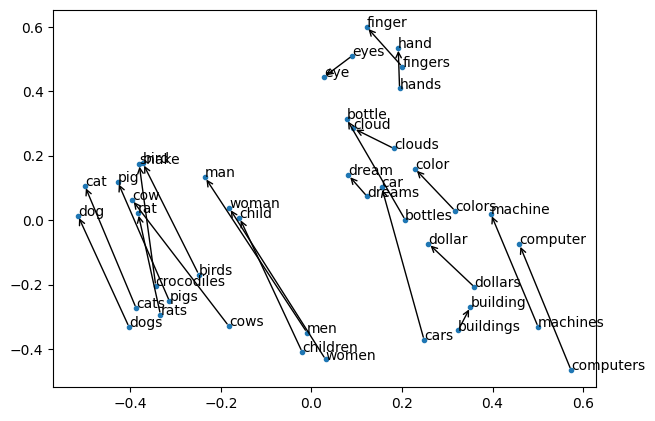

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def pp(obj):
    print(pd.DataFrame(obj))

def analogy(worda, wordb, wordc):
    result = model.most_similar(negative=[worda], 
                                positive=[wordb, wordc])
    return result[0][0]

group = ['eye','finger','hand','machine','man','pig','rat','snake','woman','bird','bottle','building','car','cat','child','cloud','color','computer','cow','dog','dollar','dream']
res = [analogy('elephant', 'elephants', memb) for memb in group]


# print(group)
# print(res)

# pp(zip(group,res))

def plot_data(orig_data, labels):
    pca = PCA(n_components=2)
    data = pca.fit_transform(orig_data)
    plt.figure(figsize=(7, 5), dpi=100)
    plt.plot(data[:,0], data[:,1], '.')
    for i in range(len(data)):
        plt.annotate(labels[i], xy = data[i])
    for i in range(len(data)//2):
        plt.annotate("",
                xy=data[i],
                xytext=data[i+len(data)//2],
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3" )
        )
        
labels = group + res
data = [model[w] for w in labels]
plot_data(data, labels)


# Find neighbors

In [ ]:
dist = DistanceMetric.get_metric('euclidean')
distance_matrix = dist.pairwise(model[model.wv.vocab])

C:\Users\Euge\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
list_words = list(model.wv.vocab.keys())

In [ ]:
dict_word_and_neighbors = {}
n = 10 # we want the first 10 neighbors
for index in range(len(list_words)):
    #get top of minimum distances
    current_word = list_words[index]
    index_neighbors = list((distance_matrix[index,:]).argsort()[:n])
    current_word_neighbors = list(itemgetter(*index_neighbors)(list_words))
    dict_word_and_neighbors[current_word] = current_word_neighbors

**Cosine similarity**

In [ ]:
cosine_sim_matrix = cosine_similarity(model[model.wv.vocab])

C:\Users\Euge\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
dict_word_and_neighbors_cosine = {}
n = 10 # we want the first 10 neighbors
for index in range(len(list_words)):
    #get top of minimum distances
    current_word = list_words[index]
    index_neighbors = list((-cosine_sim_matrix[index,:]).argsort()[:n])
    current_word_neighbors = list(itemgetter(*index_neighbors)(list_words))
    dict_word_and_neighbors_cosine[current_word] = current_word_neighbors

In [ ]:
model.most_similar(positive=['dog', 'kitten'], negative=['baby'], topn=3)

# Create neighbors file

In [9]:
np.set_printoptions(threshold=sys.maxsize)

In [14]:
!ls

analogie.png	   param.py		  time_sentences.png
analogies.txt	   plongement_mots.ipynb  voisins.txt
blog.tar.gz	   projet1_eug.ipynb	  word2vec-gensim-pre.py
csv2text.py	   questions-phrases.txt  word2vec-gensim-train-fast.py
devoir5_eug.ipynb  questions-words2.txt   word2vec-gensim-train-grid.py
devoir5.ipynb	   questions-words.txt	  word2vec-gensim-train.py
liste_mots.txt	   result		  word2vec.py


In [15]:
file1 = open('liste_mots.txt', 'r') 
Lines = file1.readlines() 

In [16]:
lines = []
for line in Lines:
    line = line.strip("\n")
    lines.append(line.lower())

In [17]:
# model = Word2Vec.load("model_final")
#model = Word2Vec.load("genw2v-size300-window5-neg10-mincount40-alpha0.03-minalpha0.0007-epochs10.w2v")
#model = gensim.models.Word2Vec.load("C:/Users/Euge/OneDrive/Documents/Session1/IFT6285-NLP/devoir5/model_bassirou.w2v")
vocabulaire = model[model.wv.vocab]
list_words = list(model.wv.vocab.keys())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [31]:
from operator import itemgetter 
from sklearn.metrics.pairwise import cosine_similarity
n = 10
myfile = open('voisins.txt', 'w')

for word in lines:
    try:
        distance_matrix = cosine_similarity(vocabulaire, model[word].reshape(1, -1))[:,0]
        ordered_value = (-distance_matrix).argsort()[1:n+1]
        index_neighbors = list(ordered_value)
        current_word_neighbors = list(itemgetter(*index_neighbors)(list_words))
        j = 0
        myfile.write("%s \t" % word)
        print(len(current_word_neighbors))
        for neighbor in current_word_neighbors:
            if(j < 9):
                myfile.write(" %s" % neighbor)
                myfile.write("[%.2f]" % distance_matrix[ordered_value[j]])
            else:
                myfile.write(" %s" % neighbor)
                myfile.write("[%.2f] \n" % distance_matrix[ordered_value[j]])
            j+=1
    except:
        continue
        
myfile.close()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


6

6

6

6

8

6

5

6

6

6

5

6

8

6

9

6

7

6

7

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


8

6

6

6

5

6

5

6

5

6

5

6

3

6

15

6

4

6

7

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


10

10


8

6

10

6

8

6

11

6

9

6

9

6

12

6

6

6

14

6

11

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


3

10


4

6

4

6

3

6

4

6

4

6

5

6

4

6

4

6

6

6

3

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


5

6

4

6

5

6

7

6

5

6

5

6

4

6

8

6

7

6

4

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


12

10


19

6

12

6

19

6

10

6

13

6

6

6

5

6

15

6

19

6

17

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


6

6

5

6

8

6

7

6

9

6

8

6

5

6

11

6

8

6

6

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


12

6

6

6

17

6

9

6

5

6

7

6

7

6

7

6

17

6

15

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


4

6

5

6

7

6

6

6

5

6

7

6

7

6

10

6

7

6

7

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


3

10


5

6

4

6

3

6

4

6

2

6

6

6

2

6

6

6

3

6

2

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


6

6

8

6

11

6

15

6

12

6

13

6

6

6

12

6

11

6

5

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


11

6

10

6

8

6

7

6

9

6

9

6

7

6

14

6

10

6

8

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


3

10


3

6

2

6

2

6

2

6

2

6

2

6

4

6

12

6

2

6

2

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


5

6

7

6

16

6

17

6

13

6

13

6

14

6

7

6

12

6

13

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


9

10


9

6

11

6

17

6

24

6

13

6

10

6

15

6

9

6

11

6

13

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


16

6

5

6

6

6

12

6

7

6

13

6

6

6

5

6

12

6

7

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


5

6

4

6

11

6

11

6

10

6

13

6

7

6

7

6

12

6

12

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


6

6

6

6

7

6

7

6

6

6

12

6

11

6

6

6

12

6

13

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


4

10


11

6

6

6

12

6

13

6

13

6

15

6

9

6

12

6

10

6

5

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


9

6

8

6

14

6

13

6

13

6

8

6

11

6

8

6

5

6

7

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


6

6

16

6

14

6

12

6

12

6

22

6

7

6

8

6

10

6

12

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


6

6

6

6

13

6

14

6

8

6

10

6

9

6

7

6

9

6

13

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


12

6

15

6

6

6

4

6

8

6

6

6

20

6

11

6

6

6

8

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


4

10


4

6

4

6

8

6

4

6

5

6

9

6

5

6

13

6

3

6

4

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


6

6

10

6

6

6

10

6

8

6

12

6

11

6

7

6

13

6

14

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


5

6

7

6

13

6

6

6

5

6

9

6

16

6

6

6

8

6

9

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


11

6

14

6

7

6

9

6

5

6

15

6

8

6

15

6

10

6

10

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


7

6

11

6

7

6

5

6

6

6

14

6

7

6

5

6

6

6

11

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


12

6

9

6

8

6

10

6

11

6

6

6

11

6

13

6

7

6

8

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


15

6

7

6

6

6

5

6

13

6

12

6

6

6

7

6

13

6

7

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


8

10


8

6

10

6

15

6

11

6

10

6

11

6

4

6

15

6

10

6

9

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


6

6

5

6

5

6

4

6

6

6

4

6

9

6

7

6

6

6

8

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


11

6

6

6

7

6

7

6

13

6

11

6

7

6

8

6

12

6

9

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


4

10


2

6

4

6

6

6

4

6

4

6

5

6

4

6

8

6

5

6

5

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


9

10


7

6

8

6

14

6

11

6

10

6

9

6

16

6

10

6

12

6

7

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


12

6

4

6

9

6

8

6

4

6

6

6

11

6

6

6

9

6

4

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


7

6

11

6

14

6

8

6

7

6

13

6

8

6

15

6

6

6

11

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


7

6

10

6

11

6

12

6

11

6

7

6

7

6

9

6

11

6

7

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


6

6

14

6

9

6

5

6

11

6

8

6

6

6

10

6

15

6

18

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


8

10


12

6

12

6

14

6

10

6

7

6

11

6

7

6

6

6

9

6

8

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


6

6

5

6

8

6

5

6

4

6

9

6

15

6

13

6

9

6

5

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


4

10


4

6

5

6

3

6

5

6

4

6

3

6

4

6

8

6

4

6

4

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


4

6

5

6

6

6

9

6

16

6

11

6

4

6

7

6

15

6

8

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


7

6

13

6

4

6

10

6

14

6

8

6

10

6

7

6

9

6

10

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


9

6

16

6

5

6

5

6

12

6

11

6

9

6

9

6

7

6

9

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


5

6

5

6

11

6

12

6

10

6

3

6

10

6

6

6

3

6

9

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


11

6

8

6

10

6

11

6

14

6

12

6

10

6

8

6

13

6

14

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


7

6

5

6

4

6

6

6

6

6

5

6

7

6

4

6

6

6

9

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


9

10


9

6

11

6

14

6

4

6

8

6

10

6

7

6

17

6

12

6

9

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


5

6

12

6

13

6

9

6

12

6

12

6

11

6

14

6

11

6

11

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


4

6

4

6

5

6

4

6

3

6

7

6

9

6

9

6

6

6

3

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


8

10


8

6

12

6

17

6

13

6

14

6

9

6

19

6

14

6

15

6

8

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


10

10


3

6

7

6

10

6

5

6

6

6

8

6

8

6

6

6

12

6

17

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


5

6

7

6

5

6

6

6

10

6

9

6

9

6

7

6

11

6

5

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


8

6

9

6

8

6

9

6

9

6

6

6

9

6

5

6

7

6

10

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


6

6

6

6

12

6

17

6

14

6

16

6

10

6

11

6

11

6

15

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


13

10


5

6

5

6

22

6

19

6

14

6

10

6

9

6

23

6

20

6

9

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


11

6

8

6

11

6

6

6

6

6

9

6

11

6

10

6

5

6

9

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


9

10


17

6

7

6

10

6

9

6

9

6

15

6

14

6

16

6

6

6

9

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


10

10


9

6

18

6

11

6

8

6

7

6

8

6

11

6

17

6

10

6

10

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


9

10


7

6

9

6

6

6

14

6

14

6

7

6

12

6

10

6

7

6

10

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


10

10


7

6

7

6

9

6

7

6

10

6

13

6

8

6

8

6

8

6

10

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


5

6

7

6

11

6

8

6

7

6

12

6

15

6

12

6

9

6

10

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


9

10


8

6

17

6

7

6

16

6

8

6

14

6

19

6

14

6

7

6

6

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


7

6

5

6

8

6

13

6

8

6

6

6

12

6

7

6

6

6

6

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


9

10


11

6

10

6

9

6

12

6

18

6

7

6

9

6

8

6

8

6

11

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


7

6

4

6

5

6

4

6

6

6

6

6

9

6

14

6

12

6

14

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


9

10


10

6

12

6

15

6

6

6

6

6

13

6

9

6

11

6

10

6

5

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


8

10


6

6

7

6

7

6

10

6

4

6

13

6

5

6

11

6

15

6

10

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


4

6

10

6

8

6

12

6

6

6

8

6

12

6

14

6

6

6

9

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


9

6

7

6

5

6

13

6

11

6

11

6

11

6

8

6

8

6

13

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


5

6

6

6

6

6

4

6

9

6

5

6

8

6

10

6

9

6

10

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


5

6

7

6

14

6

8

6

13

6

17

6

11

6

12

6

8

6

18

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


4

6

3

6

4

6

8

6

4

6

3

6

5

6

4

6

4

6

5

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


6

6

6

6

6

6

16

6

7

6

4

6

8

6

7

6

19

6

5

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


16

6

7

6

12

6

13

6

6

6

7

6

7

6

10

6

8

6

13

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


5

6

7

6

5

6

12

6

7

6

7

6

6

6

13

6

9

6

5

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


11

6

12

6

11

6

8

6

9

6

6

6

10

6

11

6

9

6

6

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


3

10


2

6

2

6

2

6

3

6

2

6

3

6

3

6

2

6

2

6

3

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


8

10


9

6

6

6

4

6

10

6

8

6

9

6

5

6

5

6

8

6

7

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


8

6

10

6

13

6

6

6

8

6

10

6

12

6

8

6

10

6

11

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


10

10


8

6

7

6

13

6

9

6

19

6

16

6

10

6

9

6

14

6

14

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


11

10


15

6

9

6

9

6

8

6

11

6

12

6

10

6

6

6

7

6

10

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


9

10


10

6

17

6

15

6

6

6

6

6

5

6

7

6

6

6

6

6

8

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


14

6

15

6

7

6

8

6

7

6

11

6

6

6

11

6

6

6

9

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


8

10


8

6

7

6

4

6

4

6

13

6

4

6

5

6

6

6

7

6

9

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


5

6

6

6

7

6

8

6

7

6

8

6

6

6

6

6

6

6

13

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


7

6

9

6

6

6

8

6

6

6

5

6

6

6

7

6

5

6

7

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


13

6

5

6

7

6

7

6

11

6

7

6

7

6

5

6

9

6

10

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


6

6

17

6

8

6

11

6

13

6

12

6

10

6

7

6

7

6

14

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


7

6

13

6

11

6

9

6

14

6

14

6

10

6

7

6

13

6

17

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


4

10


2

6

2

6

3

6

2

6

2

6

3

6

3

6

2

6

2

6

2

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


8

10


5

6

10

6

6

6

9

6

9

6

10

6

9

6

11

6

7

6

10

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


10

10


10

6

8

6

7

6

7

6

7

6

9

6

8

6

9

6

6

6

5

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


9

10


6

6

4

6

6

6

8

6

9

6

8

6

8

6

8

6

11

6

7

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


5

6

5

6

8

6

6

6

5

6

7

6

6

6

5

6

6

6

12

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


9

10


5

6

9

6

8

6

9

6

9

6

9

6

7

6

10

6

5

6

4

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


7

6

10

6

12

6

9

6

16

6

11

6

9

6

7

6

10

6

10

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


8

10


5

6

9

6

6

6

8

6

5

6

8

6

8

6

9

6

9

6

8

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


9

6

9

6

6

6

8

6

10

6

11

6

12

6

6

6

9

6

7

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


6

6

4

6

13

6

7

6

8

6

5

6

5

6

4

6

9

6

8

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


7

6

12

6

18

6

18

6

10

6

17

6

10

6

10

6

17

6

19

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


8

6

11

6

15

6

11

6

14

6

14

6

7

6

15

6

9

6

16

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


10

10


10

6

19

6

6

6

13

6

13

6

11

6

12

6

10

6

13

6

6

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


7

6

13

6

6

6

8

6

5

6

12

6

8

6

9

6

10

6

7

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


9

6

6

6

8

6

8

6

5

6

11

6

13

6

11

6

10

6

10

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


7

6

5

6

14

6

10

6

16

6

6

6

14

6

14

6

13

6

16

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


6

6

10

6

5

6

8

6

11

6

9

6

8

6

8

6

9

6

10

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


9

10


5

6

14

6

5

6

6

6

15

6

8

6

14

6

7

6

6

6

6

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


6

6

5

6

10

6

13

6

10

6

10

6

11

6

15

6

13

6

12

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


10

6

6

6

8

6

10

6

12

6

10

6

8

6

14

6

10

6

11

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


4

10


2

6

2

6

2

6

3

6

2

6

3

6

2

6

3

6

3

6

2

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


6

6

7

6

8

6

14

6

6

6

4

6

11

6

6

6

9

6

5

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


13

10


11

6

11

6

8

6

9

6

12

6

13

6

11

6

13

6

18

6

12

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


9

6

10

6

9

6

11

6

5

6

5

6

5

6

7

6

6

6

10

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


8

10


7

6

12

6

6

6

10

6

11

6

10

6

5

6

7

6

7

6

10

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


4

6

4

6

8

6

7

6

5

6

8

6

6

6

12

6

6

6

7

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


12

10


5

6

17

6

8

6

11

6

11

6

7

6

8

6

12

6

6

6

11

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


4

6

5

6

10

6

5

6

6

6

10

6

10

6

14

6

7

6

12

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


7

6

9

6

7

6

5

6

5

6

4

6

14

6

10

6

6

6

14

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


8

10


13

6

17

6

15

6

9

6

16

6

16

6

12

6

12

6

7

6

16

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


3

10


3

6

7

6

5

6

3

6

4

6

7

6

5

6

4

6

5

6

6

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


8

6

4

6

5

6

7

6

10

6

7

6

5

6

12

6

9

6

19

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


8

6

9

6

11

6

9

6

7

6

6

6

11

6

13

6

9

6

6

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


9

10


12

6

11

6

9

6

14

6

11

6

9

6

6

6

10

6

11

6

7

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


10

10


5

6

14

6

14

6

6

6

14

6

14

6

14

6

20

6

14

6

14

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


7

6

6

6

10

6

9

6

14

6

9

6

16

6

8

6

5

6

5

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


15

6

8

6

9

6

10

6

6

6

9

6

15

6

12

6

13

6

13

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


8

6

15

6

4

6

7

6

6

6

8

6

9

6

7

6

9

6

5

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


6

6

7

6

7

6

8

6

8

6

6

6

13

6

14

6

15

6

11

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


11

6

13

6

12

6

6

6

13

6

13

6

12

6

8

6

12

6

7

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


5

6

6

6

4

6

5

6

7

6

8

6

9

6

4

6

3

6

11

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


5

6

8

6

5

6

6

6

10

6

8

6

8

6

7

6

7

6

6

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


9

6

9

6

13

6

5

6

9

6

9

6

12

6

11

6

13

6

9

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


9

10


12

6

16

6

11

6

11

6

18

6

14

6

11

6

12

6

10

6

9

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


11

10


9

6

10

6

7

6

9

6

11

6

12

6

12

6

9

6

10

6

8

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


6

6

13

6

10

6

10

6

9

6

9

6

5

6

6

6

13

6

8

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


6

6

12

6

14

6

10

6

11

6

5

6

10

6

4

6

8

6

8

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


10

10


4

6

4

6

7

6

18

6

9

6

9

6

9

6

10

6

18

6

9

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


8

10


9

6

11

6

16

6

6

6

12

6

14

6

11

6

5

6

8

6

7

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


6

6

4

6

8

6

6

6

11

6

5

6

10

6

11

6

7

6

9

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


8

10


6

6

8

6

6

6

8

6

12

6

11

6

13

6

4

6

17

6

8

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


14

6

7

6

7

6

18

6

11

6

9

6

12

6

12

6

8

6

13

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


10

10


4

6

14

6

8

6

23

6

11

6

11

6

10

6

10

6

8

6

16

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


7

6

10

6

7

6

7

6

7

6

10

6

11

6

12

6

19

6

7

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


7

6

14

6

9

6

13

6

8

6

14

6

8

6

6

6

7

6

20

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


8

10


13

6

12

6

9

6

10

6

5

6

6

6

8

6

10

6

10

6

12

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


7

6

10

6

5

6

6

6

6

6

10

6

8

6

7

6

10

6

7

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


9

10


5

6

7

6

10

6

15

6

8

6

7

6

16

6

9

6

7

6

8

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


7

6

17

6

9

6

19

6

9

6

16

6

9

6

7

6

12

6

11

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


10

10


6

6

5

6

8

6

9

6

8

6

10

6

9

6

7

6

8

6

5

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


9

10


7

6

8

6

14

6

6

6

10

6

11

6

8

6

10

6

10

6

12

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


9

10


17

6

10

6

11

6

11

6

13

6

10

6

17

6

10

6

13

6

14

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


8

10


6

6

6

6

14

6

9

6

18

6

17

6

13

6

7

6

17

6

15

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


8

10


9

6

8

6

10

6

7

6

7

6

9

6

9

6

8

6

5

6

6

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


5

6

6

6

5

6

7

6

7

6

7

6

14

6

7

6

15

6

10

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


9

10


7

6

10

6

14

6

8

6

17

6

7

6

11

6

18

6

5

6

8

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


10

10


9

6

13

6

9

6

17

6

8

6

6

6

18

6

11

6

13

6

11

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


13

10


11

6

8

6

12

6

8

6

15

6

18

6

10

6

14

6

3

6

12

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


3

10


2

6

2

6

2

6

3

6

2

6

2

6

3

6

2

6

2

6

3

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


9

10


7

6

8

6

9

6

14

6

5

6

5

6

14

6

9

6

8

6

8

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


9

10


11

6

11

6

11

6

11

6

8

6

11

6

10

6

10

6

11

6

15

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


8

10


9

6

13

6

4

6

9

6

12

6

4

6

6

6

8

6

17

6

12

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


6

6

14

6

7

6

14

6

8

6

17

6

7

6

12

6

9

6

9

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


9

6

9

6

12

6

10

6

9

6

11

6

10

6

7

6

9

6

4

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


10

6

11

6

8

6

6

6

5

6

6

6

5

6

6

6

6

6

10

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


6

6

5

6

13

6

7

6

9

6

9

6

6

6

9

6

9

6

8

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


5

6

8

6

9

6

9

6

9

6

5

6

6

6

9

6

7

6

12

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


6

6

5

6

8

6

12

6

7

6

6

6

7

6

5

6

10

6

10

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


5

6

3

6

3

6

3

6

3

6

5

6

8

6

5

6

6

6

8

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


10

6

6

6

7

6

11

6

7

6

7

6

14

6

16

6

9

6

8

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


9

6

5

6

11

6

9

6

11

6

12

6

10

6

9

6

17

6

12

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


7

6

8

6

7

6

12

6

12

6

7

6

12

6

9

6

8

6

12

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


8

10


8

6

7

6

7

6

16

6

8

6

10

6

7

6

4

6

13

6

5

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


9

10


4

6

4

6

10

6

5

6

8

6

8

6

8

6

7

6

8

6

8

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


4

6

7

6

15

6

8

6

6

6

7

6

8

6

16

6

9

6

7

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


12

10


12

6

12

6

10

6

11

6

7

6

9

6

20

6

12

6

8

6

12

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


10

10


9

6

11

6

23

6

8

6

19

6

15

6

17

6

10

6

8

6

8

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


12

6

8

6

6

6

9

6

8

6

9

6

9

6

12

6

11

6

6

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


5

6

7

6

15

6

11

6

10

6

14

6

12

6

10

6

10

6

15

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


9

10


7

6

9

6

8

6

8

6

8

6

6

6

9

6

21

6

7

6

9

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


7

6

14

6

5

6

13

6

16

6

13

6

11

6

6

6

7

6

5

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


5

10


6

6

4

6

10

6

5

6

4

6

6

6

5

6

4

6

5

6

12

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


7

10


8

6

7

6

7

6

8

6

15

6

5

6

7

6

7

6

5

6

9

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


8

10


6

6

18

6

11

6

6

6

10

6

14

6

5

6

7

6

6

6

11

8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6

10


6

6

15

6

14

6

16

6

11

6

7

6

11

6

14

6

7

6

13

8

In [27]:
distance_matrix = cosine_similarity(vocabulaire, model["puppy"].reshape(1, -1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [28]:
ordered_value

array([ 8811,  2086, 18980,  4931, 43509, 10707, 51152, 13417, 36258,
       13391, 19949, 35199, 44187, 54014, 13392, 42192, 11439, 48743,
       50604, 54206, 19833, 17008, 15161, 14808, 40527,  2306, 25443,
        9131, 46260, 52148, 28025, 12991, 21467, 35769,  6768,  1519,
       34921, 15223, 50750, 49451, 25530, 44919, 40229, 46754, 41063,
       22397, 43631, 41745, 50628, 18977,  9260, 41647, 20560, 34849,
       43127, 44338,  1427, 16948, 27091, 38701, 55290, 22883,  5147,
       39878, 21784, 47021, 32221, 40344, 39865, 49610, 51652, 44393,
       37000, 13565, 27670, 56304, 38964, 14927, 55576, 45301, 24917,
       42615, 44084, 47582, 33687, 46565, 25688, 23530, 46620, 20987,
       46592, 10568, 48569, 11495, 28058,  2918, 22341, 16836, 40522,
       31964, 40999, 23716, 10567, 23788,  6605, 39127,  2066, 50319,
       36174, 48759, 23926, 15222, 55025, 48510, 14500, 38955, 39882,
       25465,  9268, 24824, 39692, 55129, 20302, 42672,  1394, 50060,
       38322, 37406,

In [29]:
distance_matrix[:,0].shape

(57007,)

In [30]:
index_neighbors

[8811, 2086, 18980, 4931, 43509, 10707, 51152, 13417, 36258, 13391]

Save accuracy

In [ ]:
import gensim, logging
from gensim.test.utils import datapath
from gensim.models import KeyedVectors, Word2Vec

def compute_exp_accuracies(root, analogy_file):
    models = f"{root}/*.w2v"
    # models = f"{root}/*.f"
    # models = f"{root}/*"
    filenames = glob.glob(models)
    nb_models = len(filenames)
    accuracies = dict()
    accuracies_lst = []
    for filename in filenames:
        print(filename)
        if filename == './result/model_window_3/model_sg_0_hs_0_negativ_0_ns_expon_0_cbowmean_0.wv.vectors.npy':
            continue
        m = Word2Vec.load(filename)
        sections = m.wv.accuracy(analogy_file)
        for sec in sections:
            if sec["section"] not in accuracies:
                accuracies[sec["section"]] = 0
            correct, incorrect = len(sec["correct"]), len(sec["incorrect"])
            if incorrect > 0:
                acc = correct / (correct + incorrect)
            else:
                acc = 0
            accuracies[sec["section"]]= (correct, incorrect, acc)
        accuracies_df = pd.DataFrame.from_dict(accuracies,orient='index',
                            columns=['correct', 'incorrect', 'accuracy'])
        accuracies_df['model'] = filename.strip(root)
        accuracies_lst.append(accuracies_df)
    final_accuracies = pd.concat(accuracies_lst, ignore_index=False)
    final_accuracies.to_csv(root + '/accuracies.csv', index=True)        

# analogy_file = 'questions-words.txt'
# gid_test_dir = './result/grid_test'
# gid_dir = './result/grid'
# model_window_3_dir = './result/model_window_3'
# outdir = './result/run1'

# final_grid = './result/grid2'
final_w2v_model = './result/run7'
# final_bass_w2v_model = './result/run8'
# final_fast_model = './result/run4'
# skip_model = './result/run5'
# cbow_model = './result/run6'
compute_exp_accuracies(final_w2v_model, analogy_file)

./result/run8/genw2v-size300-window2-neg5-mincount100-alpha0.03-minalpha0.0007-epochs10.w2v


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.evaluate_word_analogies() instead).
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


# Tuning the parameters


Grid search alpha minalpha et epochs

In [ ]:
%%shell
# alpha = [0.001, 0.05]
# min_alpha = [0.0001]
# iterr = [10, 30]
# 276315
python3 word2vec-gensim-train.py ./result -l --nb 100000 --alpha 0.001 --minalpha 0.0001 --epochs 10 --datapath /content/drive/My\ Drive/Colab\ Notebooks/data/blog/blog.txt 
python3 word2vec-gensim-train.py ./result -l --nb 100000 --alpha 0.001 --minalpha 0.0001 --epochs 30 --datapath /content/drive/My\ Drive/Colab\ Notebooks/data/blog/blog.txt 
python3 word2vec-gensim-train.py ./result -l --nb 100000 --alpha 0.001 --minalpha 0.0001 --epochs 40 --datapath /content/drive/My\ Drive/Colab\ Notebooks/data/blog/blog.txt 
python3 word2vec-gensim-train.py ./result -l --nb 100000 --alpha 0.005 --minalpha 0.0001 --epochs 10 --datapath /content/drive/My\ Drive/Colab\ Notebooks/data/blog/blog.txt 
python3 word2vec-gensim-train.py ./result -l --nb 100000 --alpha 0.005 --minalpha 0.0001 --epochs 30 --datapath /content/drive/My\ Drive/Colab\ Notebooks/data/blog/blog.txt 
python3 word2vec-gensim-train.py ./result -l --nb 100000 --alpha 0.005 --minalpha 0.0001 --epochs 40 --datapath /content/drive/My\ Drive/Colab\ Notebooks/data/blog/blog.txt 

In [ ]:
size = [100, 150]            # size of embedding
min_count = [5, 10, 30]      # take words there min_count
window = [3, 5, 9]

sg = [0, 1]                   # training algo: 1 skipgram 0 CBOW
cbow_mean = [0, 1]           # only for CBOW when sg = 1
# hierarchical softmax will be used for model training or Negative sampling
hs = [0, 1]
negative = [0, 5, 10]        # how many “noise words” should be drawn
ns_exponent = [0, 0.75, 1]   # only use it with negative sampling >0

alpha = [0.001, 0.025, 0.05]
min_alpha = [0.001, 0.0001]
iterr = [5, 10, 30]
# The threshold for configuring which higher-frequency words are randomly downsampled,
sample = [0.01, 0.0001]
trim_rule = None            # min_count will be used

In [ ]:
# %%shell
# # 7696473
# i=1000000
head -$i /content/drive/My\ Drive/Colab\ Notebooks/data/blog/blog.txt | python3 word2vec-gensim-train-grid.py ./result/grid3/ -l --nb $i --epochs 1

#Modele finale

In [ ]:
%%shell
# 7696473
i=7696473
# head -$i /content/drive/My\ Drive/Colab\ Notebooks/data/blog/blog.txt | python3 word2vec-gensim-train.py ./result/run8/ -l --nb $i --epochs 10 --negative 5 --mincount 100 --window 2
head -$i /content/drive/My\ Drive/Colab\ Notebooks/data/blog/blog.txt | python3 word2vec-gensim-train.py ./result/run6/ -l --nb $i 

Model Fasttext

In [ ]:
%%shell
# 7696473
i=7696473
head -$i /content/drive/My\ Drive/Colab\ Notebooks/data/blog/blog.txt | python3 word2vec-gensim-train-fast.py ./result/run4/ -l --nb $i